In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_data=pd.read_csv('Chennai_house_univariate_train.csv')

In [3]:
raw_data.head(n=5)

,Size,Price
0,502.69,6.3
1,503.65,6.3
2,505.46,6.5
3,505.94,6.5
4,507.02,6.6


In [4]:
raw_data.tail()

,Size,Price
92,1895.9,70.2
93,2027.0,76.7
94,2034.1,77.1
95,2127.9,81.6
96,2220.3,86.4


In [5]:
raw_data.describe()

,Size,Price
count,97.000000,97.000000
mean,815.980000,19.908247
std,386.988353,17.767208
min,502.690000,6.300000
25%,570.770000,9.300000
50%,658.940000,12.700000
75%,857.810000,20.900000
max,2220.300000,86.400000


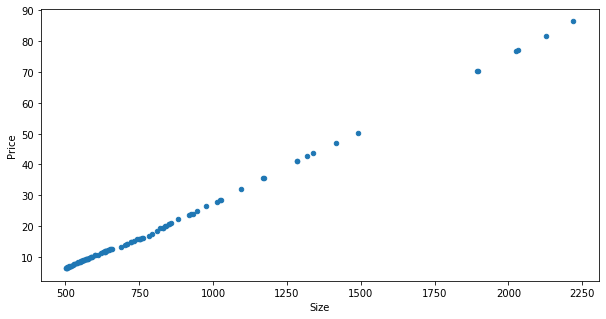

In [6]:
raw_data.plot(kind='scatter',x='Size',y='Price',figsize=(10,5))

In [7]:
data=(raw_data-raw_data.mean())/(raw_data.max()-raw_data.min())
data.head()

,Size,Price
0,-0.182399,-0.169891
1,-0.181840,-0.169891
2,-0.180786,-0.167394
3,-0.180507,-0.167394
4,-0.179878,-0.166145


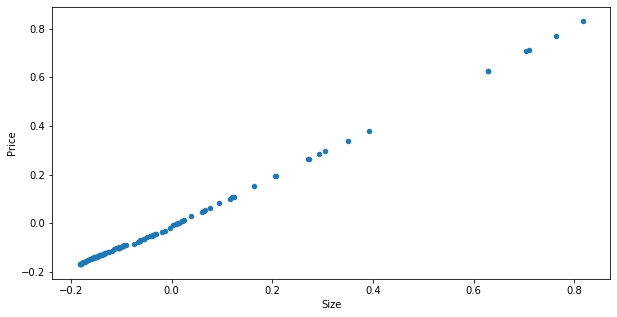

In [8]:
data.plot(kind='scatter',x='Size',y='Price',figsize=(10,5))

In [9]:
data.shape

(97, 2)

In [10]:
data.insert(0,'Ones',1)
data.head()

,Ones,Size,Price
0,1,-0.182399,-0.169891
1,1,-0.181840,-0.169891
2,1,-0.180786,-0.167394
3,1,-0.180507,-0.167394
4,1,-0.179878,-0.166145


In [11]:
cols=data.shape[1]
print(cols) #no. of columns

3


In [12]:
x=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]

In [13]:
x=np.matrix(x)
y=np.matrix(y)

In [14]:
theta=np.matrix(np.array([0,0]))

In [15]:
x.shape,theta.shape,y.shape

((97, 2), (1, 2), (97, 1))

In [16]:
def computeError(x,y,theta):
    inner=np.power(((x*theta.T)-y),2)
    return np.sum(inner)/(2*len(x))

In [17]:
computeError(x,y,theta)

0.024346853685025278

In [18]:
Learn_rate=1

In [19]:
iters=150

In [20]:
def gradientDescent(x,y,theta,Learn_rate,iters):
    temp=np.matrix(np.zeros(theta.shape))
    parameters=int(theta.ravel().shape[1])
    cost=np.zeros(iters)
    for i in range(iters):
        error=(x*theta.T)-y
        for j in range(parameters):
            term=np.multiply(error,x[:,])
            temp[0,j]=theta[0,j]-((Learn_rate/len(x))*np.sum(term))
        theta=temp
        cost[i]=computeError(x,y,theta)
    return theta,cost

In [21]:
new_theta,cost=gradientDescent(x,y,theta,Learn_rate,iters)
print(new_theta,cost)

[[0.0470416 0.0470416]] [0.02318774 0.02318482 0.02318481 0.02318481 0.02318481 0.02318481
 0.02318481 0.02318481 0.02318481 0.02318481 0.02318481 0.02318481
 0.02318481 0.02318481 0.02318481 0.02318481 0.02318481 0.02318481
 0.02318481 0.02318481 0.02318481 0.02318481 0.02318481 0.02318481
 0.02318481 0.02318481 0.02318481 0.02318481 0.02318481 0.02318481
 0.02318481 0.02318481 0.02318481 0.02318481 0.02318481 0.02318481
 0.02318481 0.02318481 0.02318481 0.02318481 0.02318481 0.02318481
 0.02318481 0.02318481 0.02318481 0.02318481 0.02318481 0.02318481
 0.02318481 0.02318481 0.02318481 0.02318481 0.02318481 0.02318481
 0.02318481 0.02318481 0.02318481 0.02318481 0.02318481 0.02318481
 0.02318481 0.02318481 0.02318481 0.02318481 0.02318481 0.02318481
 0.02318481 0.02318481 0.02318481 0.02318481 0.02318481 0.02318481
 0.02318481 0.02318481 0.02318481 0.02318481 0.02318481 0.02318481
 0.02318481 0.02318481 0.02318481 0.02318481 0.02318481 0.02318481
 0.02318481 0.02318481 0.02318481 0.02

In [22]:
computeError(x,y,new_theta)

0.0231848098114194

In [23]:
x=data.Size

In [24]:
x

0    -0.182399
1    -0.181840
2    -0.180786
3    -0.180507
4    -0.179878
5    -0.177695
6    -0.176390
7    -0.173526
8    -0.172996
9    -0.169270
10   -0.166184
11   -0.166051
12   -0.161876
13   -0.160275
14   -0.158528
15   -0.155431
16   -0.154890
17   -0.153667
18   -0.153242
19   -0.152433
20   -0.151076
21   -0.148666
22   -0.146721
23   -0.146663
24   -0.142762
25   -0.142588
26   -0.141511
27   -0.141231
28   -0.138920
29   -0.137307
        ...   
67    0.007877
68    0.012989
69    0.014474
70    0.020808
71    0.020889
72    0.024354
73    0.038752
74    0.059408
75    0.063367
76    0.066977
77    0.075326
78    0.093671
79    0.115055
80    0.120877
81    0.123090
82    0.162854
83    0.206112
84    0.206578
85    0.271785
86    0.272250
87    0.292045
88    0.304737
89    0.349567
90    0.392883
91    0.627919
92    0.628734
93    0.705061
94    0.709195
95    0.763806
96    0.817601
Name: Size, Length: 97, dtype: float64

In [25]:
Model_price=new_theta[0,0]+(new_theta[0,1]*x)

Text(0.5, 1.0, 'Predicted Price vs Size')

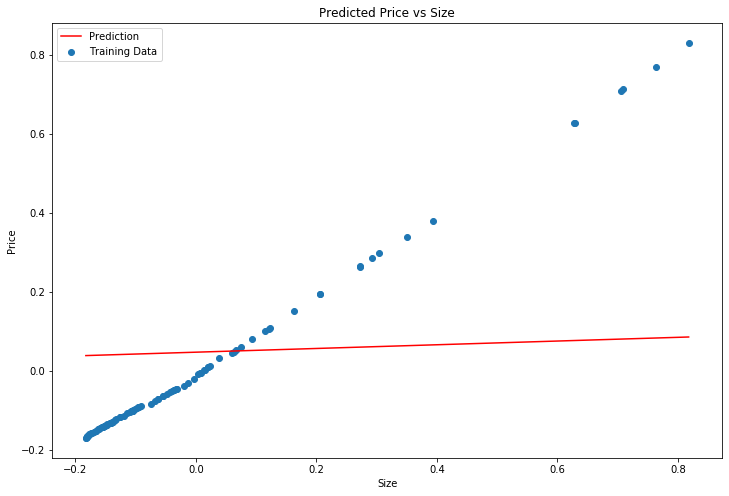

In [26]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(x,Model_price,'r',label='Prediction')
ax.scatter(data.Size,data.Price,label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Predicted Price vs Size')

Text(0.5, 1.0, 'Error vs Iterations')

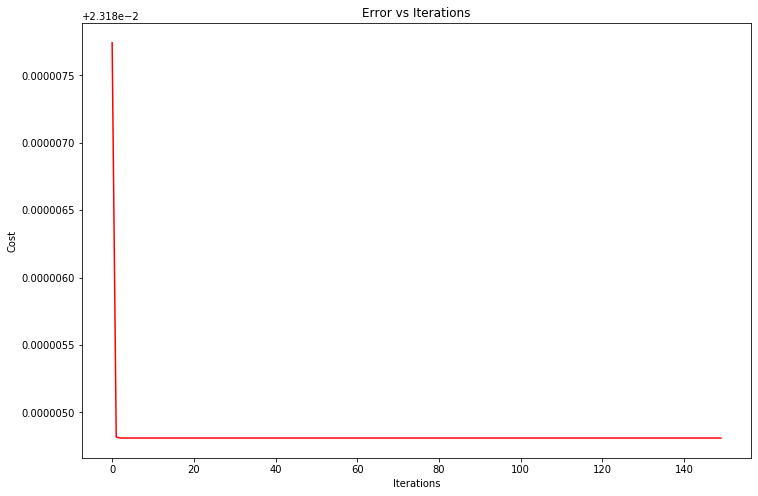

In [27]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Iterations')

In [28]:
import math
erro_r=[np.power((b-a),2) for (a,b) in zip(Model_price,y)] #mean absolute percentage error
error0=np.sum(erro_r)
error=(error0/len(y))*100
accuracy=100-error
print("accuracy %={}".format(accuracy))

accuracy %=95.36303803771612


In [29]:
def predict(new_theta,accuracy):
    #get input from the user
    size=float(input("enter the size of the House in sqt."))
    #mean Normalisation
    size=(size-raw_data.Size.mean())/(raw_data.Size.max()-raw_data.Size.min())
    #model
    price=(new_theta[0,0]+(new_theta[0,1]*size))
    #Reverse Mean Normalisation
    Predicted_Price=(price*(raw_data.Price.max()-raw_data.Price.min()))+(raw_data.Price.mean())
    Price_at_Max_Accuracy=(Predicted_Price*(1/accuracy)*100)
    Price_range=Price_at_Max_Accuracy-Predicted_Price
    return Predicted_Price,Price_range

In [33]:
#Final prediction based on Univariate Regression
Predicted_Price,Price_range=predict(new_theta,accuracy)
print('Your house cost is'+str(Predicted_Price)+'Lakhs'+'(+ or -)'+str(Price_range)+'Lakhs')

enter the size of the House in sqt.3000
Your house cost is28.467505156913067Lakhs(+ or -)1.3842128070785513Lakhs


In [ ]:
#Multivariate Regression

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df = pd.read_csv("chennai_house_multivariate_train.csv")
df.head()

,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,4,1004,131,1,1,1,1,1,1,2,1,4.0,3.9,4.9,380000,144400,7600000
1,2,1986,26,2,1,2,0,1,1,1,4,4.9,4.2,2.5,760122,304049,21717770
2,1,909,70,1,1,1,1,1,2,1,5,4.1,3.8,2.2,421094,92114,13159200
3,7,1855,14,3,2,0,0,3,3,2,3,4.7,3.9,3.6,356321,77042,9630290
4,4,1226,84,1,1,1,1,3,1,1,2,3.0,2.5,4.1,237000,74063,7406250


In [36]:
df = (df - df.mean())/(df.max() - df.min())
df.head()

,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,0.018003,-0.188889,0.157498,-0.211313,-0.214536,0.081264,0.492415,-0.499333,-0.624771,0.458243,-0.661577,0.157182,0.132033,0.473190,0.002950,0.007290,-0.153105
1,-0.315330,0.302356,-0.367502,0.122020,-0.214536,0.581264,-0.507585,-0.499333,-0.624771,-0.041757,-0.061577,0.457182,0.232033,-0.326810,0.419410,0.332871,0.503216
2,-0.481997,-0.236413,-0.147502,-0.211313,-0.214536,0.081264,0.492415,-0.499333,-0.124771,-0.041757,0.138423,0.190515,0.098700,-0.426810,0.047972,-0.099340,0.105336
3,0.518003,0.236824,-0.427502,0.455354,0.785464,-0.418736,-0.507585,0.500667,0.375229,0.458243,-0.261577,0.390515,0.132033,0.039857,-0.022993,-0.130078,-0.058719
4,0.018003,-0.077834,-0.077502,-0.211313,-0.214536,0.081264,0.492415,0.500667,-0.624771,-0.041757,-0.461577,-0.176152,-0.334634,0.206523,-0.153721,-0.136153,-0.162112


In [37]:
df.describe()

,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
count,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03,5.999000e+03
mean,2.093119e-17,-3.532948e-17,-1.665612e-19,1.454912e-16,1.352477e-16,-4.870990e-17,-4.619668e-16,1.933591e-16,-1.427615e-16,1.097268e-16,7.954223e-17,1.158146e-15,3.101175e-15,-2.912656e-15,3.284957e-18,-1.091901e-17,9.836365e-18
std,3.035182e-01,2.282279e-01,2.875667e-01,2.668545e-01,4.105341e-01,3.531722e-01,4.999841e-01,4.059612e-01,4.257780e-01,3.991885e-01,3.008085e-01,2.967964e-01,2.986970e-01,2.951563e-01,1.556604e-01,1.597292e-01,1.742934e-01
min,-4.819970e-01,-4.410154e-01,-4.975021e-01,-2.113130e-01,-2.145358e-01,-4.187365e-01,-5.075846e-01,-4.993332e-01,-6.247708e-01,-5.417570e-01,-6.615769e-01,-5.094849e-01,-5.013002e-01,-4.934767e-01,-3.353957e-01,-2.768850e-01,-4.061506e-01
25%,-1.486637e-01,-1.943921e-01,-2.475021e-01,-2.113130e-01,-2.145358e-01,-4.187365e-01,-5.075846e-01,-4.993332e-01,-6.247708e-01,-5.417570e-01,-6.157693e-02,-2.428182e-01,-2.679669e-01,-2.601434e-01,-1.136119e-01,-1.156073e-01,-1.211486e-01
50%,1.800300e-02,-3.796781e-03,-2.502084e-03,-2.113130e-01,-2.145358e-01,8.126354e-02,4.924154e-01,6.667778e-04,3.752292e-01,-4.175696e-02,1.384231e-01,-9.484914e-03,-1.300217e-03,6.523309e-03,-2.837781e-02,-2.666370e-02,-2.448916e-02
75%,1.846697e-01,1.812958e-01,2.424979e-01,1.220203e-01,-2.145358e-01,8.126354e-02,4.924154e-01,5.006668e-01,3.752292e-01,4.582430e-01,3.384231e-01,2.571818e-01,2.653664e-01,2.398566e-01,8.189724e-02,9.009882e-02,9.635156e-02
max,5.180030e-01,5.589846e-01,5.024979e-01,7.886870e-01,7.854642e-01,5.812635e-01,4.924154e-01,5.006668e-01,3.752292e-01,4.582430e-01,3.384231e-01,4.905151e-01,4.986998e-01,5.065233e-01,6.646043e-01,7.231150e-01,5.938494e-01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022AD5F015F8>,
      dtype=object)

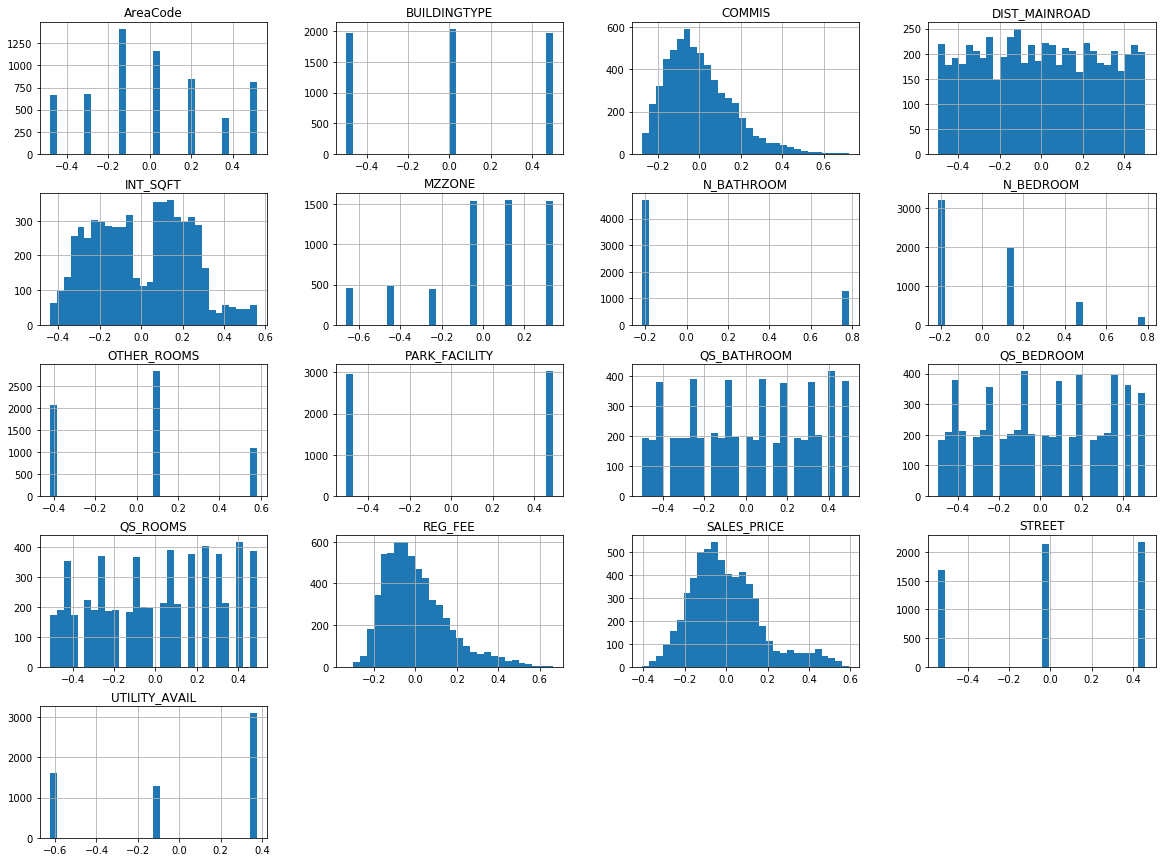

In [38]:
df.hist(bins=30, figsize = (20,15))

In [39]:
df.shape

(5999, 17)

In [40]:
df.insert(0,"Ones",1)
df.head()

,Ones,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,1,0.018003,-0.188889,0.157498,-0.211313,-0.214536,0.081264,0.492415,-0.499333,-0.624771,0.458243,-0.661577,0.157182,0.132033,0.473190,0.002950,0.007290,-0.153105
1,1,-0.315330,0.302356,-0.367502,0.122020,-0.214536,0.581264,-0.507585,-0.499333,-0.624771,-0.041757,-0.061577,0.457182,0.232033,-0.326810,0.419410,0.332871,0.503216
2,1,-0.481997,-0.236413,-0.147502,-0.211313,-0.214536,0.081264,0.492415,-0.499333,-0.124771,-0.041757,0.138423,0.190515,0.098700,-0.426810,0.047972,-0.099340,0.105336
3,1,0.518003,0.236824,-0.427502,0.455354,0.785464,-0.418736,-0.507585,0.500667,0.375229,0.458243,-0.261577,0.390515,0.132033,0.039857,-0.022993,-0.130078,-0.058719
4,1,0.018003,-0.077834,-0.077502,-0.211313,-0.214536,0.081264,0.492415,0.500667,-0.624771,-0.041757,-0.461577,-0.176152,-0.334634,0.206523,-0.153721,-0.136153,-0.162112


In [41]:
cols = df.shape[1]
x = df.iloc[:,0:cols-1]
y = df.iloc[:,cols-1:cols]

In [42]:
cols = df.shape[1]
x = df.iloc[:,0:cols-1]
y = df.iloc[:,cols-1:cols]

In [43]:
x = np.matrix(x)
y = np.matrix(y)
theta = np.matrix(np.array([0]*(cols-1)))

In [44]:
x.shape, theta.shape, y.shape

((5999, 17), (1, 17), (5999, 1))

In [45]:
def computeError(x,y,theta):
    inner=np.power(((x*theta.T)-y),2)
    return np.sum(inner)/(2*len(x))

In [46]:
computeError(x,y,theta)

0.015186556392354323

In [47]:
Learn_rate=1

In [48]:
iters=150

In [49]:
def gradientDescent(x,y,theta,Learn_rate,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (x*theta.T)-y
        for j in range(parameters):
            term = np.multiply(error,x[:,j])
            temp[0,j] = theta[0,j]-((Learn_rate/len(x))*np.sum(term))
        theta = temp
        cost[i] = computeError(x,y,theta)
    return theta, cost

In [50]:
new_theta, cost = gradientDescent(x,y,theta,Learn_rate,iters)
print(new_theta,cost)

[[ 1.89509648e-17 -6.39818746e-02  1.38075852e-01  3.09724881e-03
   7.01090414e-02  2.17123709e-02  1.56359887e-01  2.87829557e-02
  -1.12844191e-01 -6.94872196e-03  9.33655962e-03  1.04579552e-01
   5.41168649e-03  1.21871297e-03  3.72848228e-03  4.05504694e-01
   1.05573436e-01]] [0.01141782 0.00884014 0.00705888 0.00581573 0.00493954 0.00431571
 0.00386679 0.00354003 0.00329924 0.00311941 0.00298317 0.00287836
 0.00279642 0.0027313  0.00267866 0.00263539 0.00259925 0.00256859
 0.00254219 0.00251916 0.00249882 0.00248065 0.00246425 0.00244933
 0.00243564 0.00242299 0.00241122 0.00240023 0.00238989 0.00238014
 0.00237089 0.0023621  0.00235371 0.00234568 0.00233797 0.00233056
 0.00232342 0.00231652 0.00230984 0.00230337 0.00229709 0.00229099
 0.00228505 0.00227927 0.00227363 0.00226812 0.00226274 0.00225749
 0.00225234 0.00224731 0.00224238 0.00223755 0.00223282 0.00222817
 0.00222362 0.00221914 0.00221475 0.00221044 0.0022062  0.00220204
 0.00219795 0.00219392 0.00218997 0.00218608 0

In [51]:
computeError(x,y,new_theta)

0.001997794984267301

In [52]:
Model_price = x.dot(new_theta.T)

In [53]:
x

matrix([[ 1.        ,  0.018003  , -0.18888933, ...,  0.47318998,
          0.00294967,  0.0072896 ],
        [ 1.        , -0.31533033,  0.3023563 , ..., -0.32681002,
          0.41940991,  0.33287133],
        [ 1.        , -0.481997  , -0.23641309, ..., -0.42681002,
          0.0479721 , -0.09934035],
        ...,
        [ 1.        ,  0.018003  , -0.25542259, ..., -0.06014336,
         -0.07200445, -0.10185896],
        [ 1.        , -0.14866367, -0.26892935, ...,  0.50652331,
         -0.14423821, -0.13063841],
        [ 1.        , -0.31533033,  0.17979502, ...,  0.17318998,
          0.42010232,  0.34177314]])

In [54]:
import math
erro_r = [np.power((b-a),2) for (a,b) in zip(Model_price, y)]
error0 = np.sum(erro_r)
error = (error0/len(y))*100
print("error % = {}".format(error))

error % = 0.39955899685346025


In [55]:
accuracy = 100 - error
print("accuracy % = {}".format(accuracy))

accuracy % = 99.60044100314654


In [56]:
cols

18

In [57]:
df.head()

,Ones,AreaCode,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,OTHER_ROOMS,PARK_FACILITY,BUILDINGTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,REG_FEE,COMMIS,SALES_PRICE
0,1,0.018003,-0.188889,0.157498,-0.211313,-0.214536,0.081264,0.492415,-0.499333,-0.624771,0.458243,-0.661577,0.157182,0.132033,0.473190,0.002950,0.007290,-0.153105
1,1,-0.315330,0.302356,-0.367502,0.122020,-0.214536,0.581264,-0.507585,-0.499333,-0.624771,-0.041757,-0.061577,0.457182,0.232033,-0.326810,0.419410,0.332871,0.503216
2,1,-0.481997,-0.236413,-0.147502,-0.211313,-0.214536,0.081264,0.492415,-0.499333,-0.124771,-0.041757,0.138423,0.190515,0.098700,-0.426810,0.047972,-0.099340,0.105336
3,1,0.518003,0.236824,-0.427502,0.455354,0.785464,-0.418736,-0.507585,0.500667,0.375229,0.458243,-0.261577,0.390515,0.132033,0.039857,-0.022993,-0.130078,-0.058719
4,1,0.018003,-0.077834,-0.077502,-0.211313,-0.214536,0.081264,0.492415,0.500667,-0.624771,-0.041757,-0.461577,-0.176152,-0.334634,0.206523,-0.153721,-0.136153,-0.162112


In [58]:
def predict(new_theta,accuracy, cols):
    x_unknown = [1]
    for i in range (1,cols-1) :
        attr = float(input ("Enter the attribute {} ".format(i)))
        attr = (attr-df.iloc[0:,i].mean())/(df.iloc[0:,i].max()-df.iloc[0:,i].min())
        x_unknown.append(attr)
    x_unknown = np.matrix(x_unknown)
    price = x_unknown.dot(new_theta.T)[0,0]
    Predicted_Price = (price*(df.SALES_PRICE.max()-df.SALES_PRICE.min()))+(df.SALES_PRICE.mean())
    Price_at_Max_Accuracy = (Predicted_Price*(1/accuracy)*100)
    Price_range = Price_at_Max_Accuracy - Predicted_Price
    return Predicted_Price, Price_range

In [59]:
Predicted_Price, Price_range = predict(new_theta,accuracy, cols)
print("Your house cost is " + str(Predicted_Price) + "Lakhs " + "(+or-) " +str(Price_range) + 'Lakhs')

Enter the attribute 1 23
Enter the attribute 2 32
Enter the attribute 3 21
Enter the attribute 4 54
Enter the attribute 5 64
Enter the attribute 6 34
Enter the attribute 7 64
Enter the attribute 8 32
Enter the attribute 9 12
Enter the attribute 10 56
Enter the attribute 11 33
Enter the attribute 12 2
Enter the attribute 13 12
Enter the attribute 14 13
Enter the attribute 15 22
Enter the attribute 16 11
Your house cost is 25.781614699150097Lakhs (+or-) 0.10342600898854215Lakhs
